<h1><center>Movies</center></h1>
<h2><center>What is the most popular type of movie?<br>Does higher budget mean higher revenue?</center></h2>

<h3><center>A Report by Cathal and Marijana<h3></center>


# Introduction

For our Dataset Analysis project, we have chosen a movies dataset from the Github repository. Our choice was based on a common interest we both have, the general area of movies, but also one in which we both have extensive knowledge of. Our analysis will look at movies released between 2000-2015, an analysis of the genre and revenue variables, and will examine the correlation between budget and revenue. 

The dataset we are using here comes from the Udacity--Project-Investigate-TMDB-Movies-Dataset project on GitHub (antra0497, 2018). It is a sample of a much larger dataset from the The Movie Database which contains over 830,000 entries (The Movies Database, 2022).

In [2]:
import matplotlib.pyplot as plt # for plotting graphs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # also for plotting graphs
from datetime import datetime #reformatting date and time variables. 
from scipy import stats
movies_metadata=pd.read_csv('https://raw.githubusercontent.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/master/tmdb-movies.csv')
#Our Dataset


The dataset we have selected has 10866 entries and 21 columns. The dataset info is:

In [3]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The Data Dictionary

#### tmdb-movies.csv

|Variable|Class|Description|
|:--------|:-----|:-----------|
id|Double|The Movie Database reference|
imdb_id|Character|Internet Movie Database (IMDB) reference|
popularity|Double|Popularity value given as a mark out of ten|
budget|Double|Money that was spent on the movie|
revenue|Double|What the movie earned at the box office|
original_title|Character|Original title of the movie. Depending on the region, the title of the movie can change.|
cast|Character|The movie cast |
homepage|Character|The webpage created for the movie|
director|Character|The director|
tagline|Character|The tagline used in the promotion|
keywords|Character|Search words assigned to the movie|
overview|Character|Plot description|
runtime|Double|The runtime of the movie in minutes|
genres|Character|The genres that the movie fits into|
production_companies|Character|The production companies involved|
release_date|Character|The date the movie was released 1st MM/DD/YY|
vote_count|Double|Number of people polled on The Movie Database|
vote_average|Double|Average vote value on a 1-10 scale with 10 being the best value and 1 being the lowest|
release_year|Double|The year the movie was release YYYY|
budget_adj|Double|The budget of the movie adjusted for inflation|
revenue_adj|Double|The revenue of the movie adjusted for inflation|






In [4]:
#A small sample of the dataset.
movies_metadata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Central Tendencies and Measures of Variability.

### Picking the variables and years

The dataset we are looking at have entries going all the way back to 1955 and includes many columns that we are not interested in. In order to make our analysis meaningful, we are selecting specific variables, movies released between 2000 and 2015, selecting where the revenue exceeds 0 - indicating the movie had a cinematic release. We've also added 2 extra variables - "Revenue_in_millions" and "budget_in_millions". This is to help plot these two variables.

In [5]:
movies_cols=['popularity','budget','revenue','genres','original_title','release_year','director','cast', 'release_date']
#the variables we are interested in.
movies_metadata=pd.read_csv('https://raw.githubusercontent.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/master/tmdb-movies.csv',
                           usecols=movies_cols) #select the specific columns from the dataset



In [6]:
movies_sample = movies_metadata.query("release_year >=2000")
movies_sample = movies_sample.query("budget > 0") # Not all movies in our sample have their budget recorded.   
movies_sample = movies_sample.query("revenue > 0") # this filter is designed to include movies that got a cinema release
revenue_in_millions=movies_sample['revenue']/1000000 # these are to make plotting revenue and budget variables a little clearer
budget_in_millions=movies_sample['budget']/1000000

So, lets have a look at what this has done to our data:

In [7]:
movies_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501 entries, 0 to 8883
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      2501 non-null   float64
 1   budget          2501 non-null   int64  
 2   revenue         2501 non-null   int64  
 3   original_title  2501 non-null   object 
 4   cast            2498 non-null   object 
 5   director        2500 non-null   object 
 6   genres          2501 non-null   object 
 7   release_date    2501 non-null   object 
 8   release_year    2501 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 195.4+ KB


### Finding missing values in our dataset

In [8]:
# Total missing values for each feature
print(movies_sample.isnull().sum())
#Total number of missing values
print ( movies_sample.isnull().sum().sum() )

popularity        0
budget            0
revenue           0
original_title    0
cast              3
director          1
genres            0
release_date      0
release_year      0
dtype: int64
4


There is no data stored for certain variables .Missing values are being detected in variable ‘cast’( 3 missing values) and variable ‘director’ (1 missing value) .
Missing data happens due to incomplete data entry, equipment malfunctions, lost files, and many other reasons.

### Qualitative Variable - Genres

Our first analysis will look at the breakdown of genres in the sample. In our dataset, each movie title is assigned whatever genre applies to it. For example, Jurassic World genre reads "Action|Adventure|Science Fiction|Thriller" with each genre seperated by a "|". In order to seperate them, we will make use of the function data(column) to seperate out the genres and thus be able to count them.

In [9]:
#The genres and cast columns contains multiple entries seperated by a | This function seperates them out.
def data(column):
    #will take a column, and separate the string by '|'
    data = movies_sample[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    return count

In [10]:
genre_sample=data('genres') #variable to store the returned value
count = data('genres')
count.head(5) #printing top 5 values

Drama        1149
Comedy        889
Thriller      768
Action        682
Adventure     466
dtype: int64

We can see that mode for genres, 1149 has been repeated the most times, meaning that Drama is mode of our genres. Graph bar below will be showing it in detail.

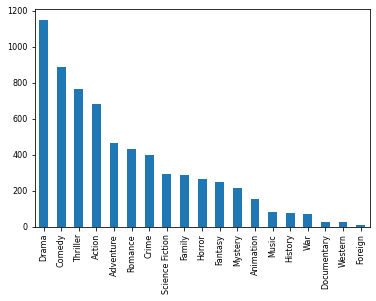

In [11]:
diagram=genre_sample.head(20).plot.bar(fontsize=8)

When we take into account the graph above, it may not be surprise that drama is the most popular genre. Drama is the least expensive genre to make movies because special costumes, locations,, special/visual effects, etc. are not always needed. Of all the genres drama has the broadest definition in a way that everything that happens anywhere ever is a drama. Other genres have higher bar for classification in a way that horror movies will have scary elements , comedies will have funny elements etc. Filmmakers are showing loss of interest in making foreign, western, documentary and war movies.

### Quantitative Variable - Revenue

Our second analysis will look at the variable "revenue". Firstly, let's look at the central tendencies: 

In [12]:
print('The median of the sample is: ',movies_sample['revenue'].median())
print('The mean of the sample is: ',movies_sample['revenue'].mean())
print('The minimum value of the sample is: ', movies_sample['revenue'].min())
print('The maximum value of the sample is: ', movies_sample['revenue'].max())

The median of the sample is:  53909751.0
The mean of the sample is:  121876715.42902839
The minimum value of the sample is:  2
The maximum value of the sample is:  2781505847


As the median and the mean are of very different values, the distribution of the variable is not symmetrical. We're not including mode in this anaylsis as movie revenues do not fall into fixed measure categories. The maximum value is related to one movie - "Avatar", which in 2015 was the most successful movie of all time. With the wide difference between the median and mean results, this indicates that there is a wide range of values within this dataset.

In order to show a more meaningful distribution graph, I've used the variable "revenue_in_millions".

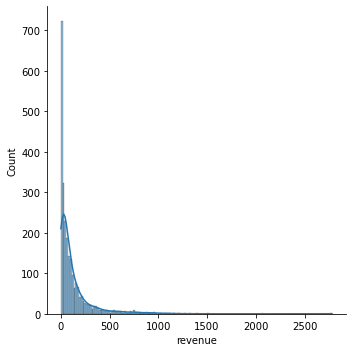

In [13]:
sns.displot(revenue_in_millions, kde=True)

This plot indicates that the distribution of the variable is positively skewed with over 700 of the values between registering very low revenues. The graph indicates what earlier analysis shows: A wide range of values in the variable. However it also shows that the vast majority of the sample had low revenues. The strong positive skew also indicates the presence of many outliers in the above \$500 million revenue range. Let's do a box plot of the variable:

<AxesSubplot:xlabel='revenue'>

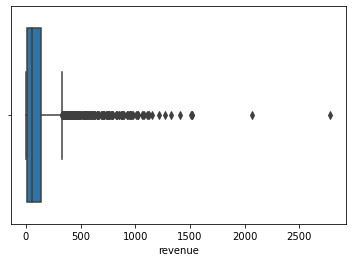

In [14]:
sns.boxplot(x=revenue_in_millions)

The boxplot is very interesting. Similar to the distribution plot above, a very strong positive skew with a lot of outliers in the range. The first quartile is almost non-existant, the fourth quartile is quite narrow and the bulk of the plot is given over to outliers.

# Correlation Analysis

Let's begin with a heatmap showing the correlation co-efficients of all the quantitative variables in our sample.

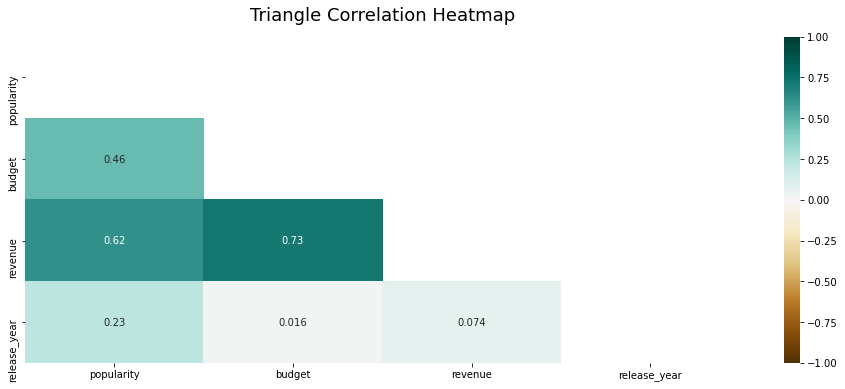

In [15]:
#calculating correlation between variables from our dataset
# function called heatmap that allows us to visualize the correlation between variables
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(movies_sample.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(movies_sample.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


This heatmap shows  positive correlation between variables in our dataset, going from 0.016 (the lowest value), to 0.73 as highest.
We will orientate on correlation between budget and revenue which shows the strongest correlation of 0.73. It would indicate that the more money is spent on the movie, the higher the revenue. Let's do a scatter graph of these two variables:

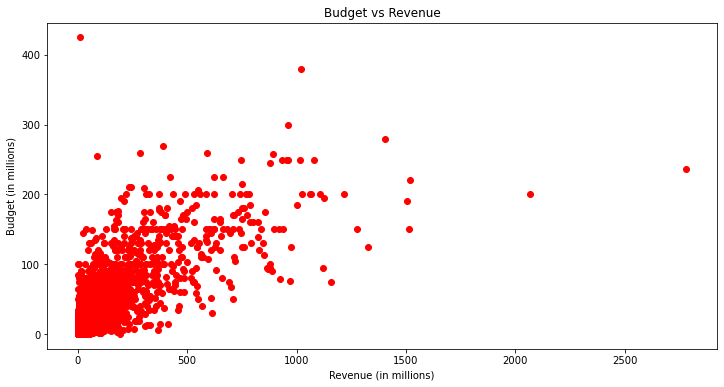

In [16]:
X=revenue_in_millions
y=budget_in_millions
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Budget vs Revenue')
plt.xlabel('Revenue (in millions)')
plt.ylabel('Budget (in millions)')

plt.show()

It would appear there is a strong correlation between budget and revenue. However, it is worth noting that there is a cluster around low budget, low revenue productions. As we go above budgets of \\$100 million, and revenue of \\$500 million the scatter element begins to spread with some high budget movies achieving very low revenues but also with some high budget movies achieving revenues of above \\$1 billion.

In both the high budget and high revenue elements, there are some outliers. Firstly, let's have a look at movies that earned over \\$1 billion at the box office:

In [17]:
outliers1=movies_sample.query("revenue>1000000000")
outliers1.info()
outliers1.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 6555
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      20 non-null     float64
 1   budget          20 non-null     int64  
 2   revenue         20 non-null     int64  
 3   original_title  20 non-null     object 
 4   cast            20 non-null     object 
 5   director        20 non-null     object 
 6   genres          20 non-null     object 
 7   release_date    20 non-null     object 
 8   release_year    20 non-null     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.6+ KB


,popularity,budget,revenue,original_title,cast,director,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,4/1/15,2015
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,6/17/15,2015
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,Action|Adventure|Science Fiction,4/22/15,2015
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,12/10/09,2009
1921,5.572950,200000000,1025467110,Alice in Wonderland,Mia Wasikowska|Johnny Depp|Anne Hathaway|Helen...,Tim Burton,Family|Fantasy|Adventure,3/3/10,2010
1930,2.711136,200000000,1063171911,Toy Story 3,Tom Hanks|Tim Allen|Ned Beatty|Joan Cusack|Mic...,Lee Unkrich,Animation|Family|Comedy,6/16/10,2010
2875,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Drama|Action|Crime|Thriller,7/16/08,2008
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,Adventure|Family|Fantasy,7/7/11,2011


Why are they considered outliers? Well, movies of a similar budget did not do nearly as well at the box office as these examples. A possible explanation is that they are predominately movies that are part of very commercially successful franchises such as the Marvel MCU, Star Wars, Harry Potter and James Bond. However, Avatar and Frozen are stand out ones not being part of any franchise at the time. There is also movies that inspite of large budgets, failed to make a profit:

In [18]:
outliers2=movies_sample.query("budget>20000000")
outliers2=outliers2.query("revenue<budget") #movies that did not make a profit
outliers2.info()
outliers2.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 57 to 8881
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      355 non-null    float64
 1   budget          355 non-null    int64  
 2   revenue         355 non-null    int64  
 3   original_title  355 non-null    object 
 4   cast            355 non-null    object 
 5   director        355 non-null    object 
 6   genres          355 non-null    object 
 7   release_date    355 non-null    object 
 8   release_year    355 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 27.7+ KB


,popularity,budget,revenue,original_title,cast,director,genres,release_date,release_year
57,2.575711,60000000,30418560,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,Comedy|Adventure,1/21/15,2015
59,2.550747,70000000,17752940,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,Mystery|Crime|Action|Thriller|Drama,1/13/15,2015
66,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,11/20/15,2015
73,2.234573,150000000,128388320,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,Adventure|Family|Fantasy,9/24/15,2015
89,1.956320,50000000,3324330,Child 44,Tom Hardy|Gary Oldman|Noomi Rapace|Joel Kinnam...,Daniel Espinosa,Crime|Thriller,3/15/15,2015
135,1.225325,40000000,10664749,The Gunman,Sean Penn|Jasmine Trinca|Javier Bardem|Ray Win...,Pierre Morel,Action|Drama|Crime,2/16/15,2015
142,1.138395,40000000,34227298,Victor Frankenstein,James McAvoy|Daniel Radcliffe|Jessica Brown Fi...,Paul McGuigan,Drama|Science Fiction|Thriller,11/10/15,2015
167,0.906036,25000000,24902723,The 33,Antonio Banderas|Rodrigo Santoro|Juliette Bino...,Patricia Riggen,History|Drama,8/6/15,2015
183,0.814206,37000000,26250020,Aloha,Bradley Cooper|Emma Stone|Rachel McAdams|John ...,Cameron Crowe,Adventure|Comedy|Romance,5/27/15,2015
186,0.795762,28000000,7002261,Our Brand Is Crisis,Sandra Bullock|Anthony Mackie|Billy Bob Thornt...,David Gordon Green,Drama|Comedy,9/11/15,2015


As noted with the movies above that were part of larger franchises, none of the movies listed here were part of a larger franchise. They also received less than warm reviews from both audiences and critics alike. 

### Does Correlation imply Causation?

Our analysis indicates no it doesn't. A higher budget does not necessarily mean higher revenue as there are other factors at play such as audience reaction and membership of a larger franchise. There are also cases that a very low budget was spent and the movie made a very large amount of money. A famous example of this is the movie "Paranormal Activity" which cost \\$450,000 to produce and earned \\$194 million at the box office (The Numbers, 2022).

### Conclusion

While it appears that higher budget movies do earn higher revenues, this is not always the case and there are other factors at play. Membership of a larger franchise appears to be a key factor in movies doing exceptionally well at the box office but also negative reviews by critics and audiences are also key factor in the lack of success of a movie. The movie "Child 44" received a 27% rating from Rotten Tomatoes (Rotten Tomatoes, 2015) and most of the movies that did not make a profit achieved similar scores.

# Regression Analysis

Let's do a regression analysis on the same two variables we used in Correlation - Budget and Revenue. Does an increase in budget necessarily mean an increase in revenue? We already have a correlation coefficient of 0.73, so now we will generate an equation for best fit.

In [19]:
movies_fit = np.polyfit(revenue_in_millions, budget_in_millions, 1)

movies_fit

array([ 0.17482922, 22.95477992])

The output gives us a = 0.175 and b = 22.955. With these two values we can now calculate our Linear Regression Model:

Revenue: R 

Budget: B 

Linear Regression Model: R = 0.175*B + 22.955


Now, let's plot the regression anaylsis of the two variables. For this purpose, we are using code created by Lorraine Li (Li, 2018).

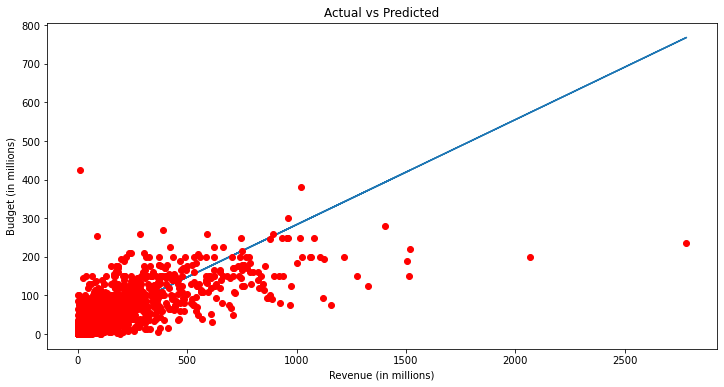

In [20]:
# Calculate the mean of X and y
X=revenue_in_millions
y=budget_in_millions

xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
movies_sample['xycov'] = (budget_in_millions - xmean) * (budget_in_millions - ymean)
movies_sample['xvar'] = (budget_in_millions - xmean)**2

# Calculate beta and alpha
beta = movies_sample['xycov'].sum() / movies_sample['xvar'].sum()
alpha = ymean - (beta * xmean)
ypred = alpha + beta * X

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Revenue (in millions)')
plt.ylabel('Budget (in millions)')

plt.show()

Our analysis indicates that in the future, the more money you spend on a movie, the more successful it is likely to be. Now, let's calculate a predicitive figure. A movie producer decides that he wishes to make \\$1 billion dollars from his next production, how much money does he need to spend to achieve this:

In [21]:
print(np.polyval(movies_fit, [1000])) # 1000 represents $1 billion dollars as a revenue_in_millions value

[197.78400111]


The output indicates that the producer would need to spend just over \\$197 million dollars to achieve his goal. How accurate is this figure though? For this, we need to calculate the Coefficient of Determination:

In [22]:
from sklearn.metrics import r2_score
actual_revenue = revenue_in_millions
predicted_revenue = ((budget_in_millions*0.175)+22.955)
R_square = r2_score( actual_revenue, predicted_revenue) 
print('Coefficient of Determination:', R_square)

Coefficient of Determination: -0.15441365094101478


The coefficient of determination is only 15.4% - which is extremely low. This indicates that the linear regression model isn't at all accurate. Even with a strong correlation between budget and revenue figures, the presence of a large number of outliers indicate that there are many other factors at play in determining the success of movie.

## Conclusion
 
This was an intriguing data analysis that looked at movies released between 2000 and 2015.
Following this analysis, we can reach the following conclusions:

* Drama is the most made and popular genre, followed by comedy, thriller, action and  adventure.

* The 'Avatar' film, directed by James Cameron, earns the highest revenue in this dataset, earning over \\$2.7 billion.

* Correlation analysis indicates that there is a significant relationship between revenue and budget based on the various scatter plots, however regression analysis does not support the same finding. There are numerous additional factors at work in determining a movie's success, even in the face of a strong correlation between budget and revenue variables.
